In [1]:
import numpy as np
import matplotlib.pyplot as plt

from keras.layers import Input, Flatten, Dense
from keras.models import Model
from keras.optimizers import Adam
from keras.utils import to_categorical

from keras.datasets import cifar10

In [ ]:
NUM_CLASSES = 10

Load the data **cifar10** from *keras dataset*

In [ ]:
(x_train,y_train) , (x_test,y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


<!-- Normalization is done here! -->
Converting into to *float32*
Max size is 255

In [ ]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

convert to categorical

In [ ]:
y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

In [ ]:
input_layer = Input((32,32,3))
# input is flatten Multidimentional to 1D
x = Flatten()(input_layer)
# 200 and 150 are the number of neurons
x = Dense(200, activation = 'relu')(x) #'relu' negative valuevine 0 aayit convert cheyum
x = Dense(150, activation = 'relu')(x) #'relu= Rectified Linear Unit': result +ve value ahnenkil ah value thanne return cheyum

output_layer =  Dense(NUM_CLASSES,activation = 'softmax')(x) #'Softmax oru activation functio(refer note)'

model =  Model(input_layer,output_layer)


Information about the Model

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 200)               614600    
                                                                 
 dense_1 (Dense)             (None, 150)               30150     
                                                                 
 dense_2 (Dense)             (None, 10)                1510      
                                                                 
Total params: 646260 (2.47 MB)
Trainable params: 646260 (2.47 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


weights are updated by lr=0.0005
<!-- model is compiled and the loss function is managed by 'Categorical crosssentropy'(refer google) -->

In [ ]:
opt = Adam(learning_rate=0.0005)
model.compile(loss='categorical_crossentropy',optimizer=opt, metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, batch_size=32, epochs=10, shuffle=True)

Epoch 1/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.8485 - accuracy: 0.3348
Epoch 2/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.6695 - accuracy: 0.4042
Epoch 3/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.5861 - accuracy: 0.4359
Epoch 4/10
1563/1563 [==============================] - 15s 10ms/step - loss: 1.5328 - accuracy: 0.4538
Epoch 5/10
1563/1563 [==============================] - 15s 10ms/step - loss: 1.4928 - accuracy: 0.4688
Epoch 6/10
1563/1563 [==============================] - 15s 10ms/step - loss: 1.4629 - accuracy: 0.4785
Epoch 7/10
1563/1563 [==============================] - 15s 10ms/step - loss: 1.4366 - accuracy: 0.4875
Epoch 8/10
1563/1563 [==============================] - 15s 10ms/step - loss: 1.4076 - accuracy: 0.4971
Epoch 9/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.3854 - accuracy: 0.5066
Epoch 10/10
1563/1563 [==============================] - 16s 10m

In [ ]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.4443 - accuracy: 0.4878


[1.4443105459213257, 0.4878000020980835]

In [ ]:
CLASSES = np.array(['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck'])

preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis= -1)]
actual_single = CLASSES[np.argmax(y_test, axis= -1)]

313/313 [==============================] - 1s 3ms/step


In [ ]:
preds

array([[3.45092081e-02, 1.12623265e-02, 6.28744811e-02, ...,
        3.82458861e-03, 8.66387039e-02, 7.50304945e-03],
       [8.24820027e-02, 1.33739352e-01, 3.80147860e-04, ...,
        1.98029098e-04, 6.61273122e-01, 1.21198379e-01],
       [1.38996437e-01, 3.98738980e-02, 1.00351672e-03, ...,
        1.58439518e-03, 8.00429344e-01, 1.43072745e-02],
       ...,
       [7.24823400e-02, 3.12830991e-04, 1.82146147e-01, ...,
        3.61500308e-02, 8.14453699e-03, 1.13816420e-03],
       [2.97093131e-02, 1.08734993e-02, 1.36617795e-01, ...,
        4.48156558e-02, 1.25878295e-02, 1.00194924e-02],
       [7.03195482e-02, 1.39620330e-03, 1.44528225e-01, ...,
        4.31088328e-01, 1.43541703e-02, 9.90799628e-03]], dtype=float32)

Predicted

In [ ]:
preds_single

array(['cat', 'ship', 'ship', ..., 'cat', 'dog', 'horse'], dtype='<U10')

In [ ]:
preds_single.shape

(10000,)

Actual

In [ ]:
actual_single

array(['cat', 'ship', 'ship', ..., 'dog', 'automobile', 'horse'],
      dtype='<U10')

To visualize

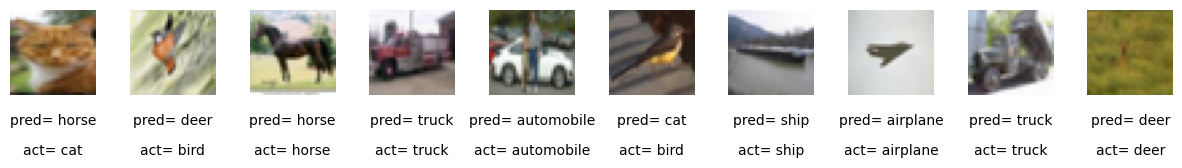

In [ ]:
n_to_show = 10
indices = np.random.choice(range(len(x_test)),n_to_show)

fig = plt.figure(figsize=(15,3))
fig.subplots_adjust(hspace=0.4,wspace=0.4)

for i, idx in enumerate(indices):
  img = x_test[idx]
  ax = fig.add_subplot(1,n_to_show, i+1)
  ax.axis('off')
  ax.text(0.5, -0.35, 'pred= '+str(preds_single[idx]),fontsize=10,ha='center',transform=ax.transAxes)
  ax.text(0.5, -0.7, 'act= '+str(actual_single[idx]),fontsize=10,ha='center',transform=ax.transAxes)
  ax.imshow(img)